# Anilov Laxina

## Research question/interests

My research question(s) will be: I want to see if age is in correlation with mental health issues in tech. Could it be that the older an individual is, the more common it is for one to have a mental health issue? If so and if they are from the United States, which states are they from and which location has the most occurances of mental health issues?

For a rough plan, I could just divert my attention on the `Age`, `Country`, and `State` column and remove some of the columns on my own dataset that I may or may not need.

If need be, I could also focus on the gender of the individuals if there is not enough depth with my research.

**Refined research question:** **I still want to see if age is in correlation with mental health issues in tech. However, I will focus my attention on the United States and find out which state they are from. This will give me insight on how age can affect an individual's mental health.**

**Refined Analysis Plan:**
1. Isolate the United States from the dataset
2. Find the highest occurances of which state mental health occurs in the U.S
3. Try and associate their age with the state that they are from
4. Make a conclusion

## Code

### Load CSV File/Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("..\data\\raw\mental health in tech.csv")

# Just print the first 9 rows of the dataset
df.head(9)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN


## Exploratory Data Analysis (EDA)


In [ ]:
# group the data by Country and Age, and count the occurrences
grouped = df.groupby(['Country', 'Age']).size().reset_index(name='counts')

# get the top 10 most common countries
top_countries = grouped.groupby('Country')['counts'].sum().nlargest(10).index

# filter the original DataFrame to only include the top 10 most common countries
filtered_df = df[df['Country'].isin(top_countries)]

# group the filtered data by Country and Age, and count the occurrences
filtered_grouped = filtered_df.groupby(['Country', 'Age']).size().reset_index(name='counts')

# # create a pivot table for the number of occurrences in each country
pivot_table = pd.pivot_table(filtered_grouped, values='counts', index=['Country'], columns=['Age'], aggfunc='sum', fill_value=0)

# remove rows with negative signs
pivot_table = pivot_table.loc[~pivot_table.index.astype(str).str.startswith('-')]

# add a column for the total number of occurrences in each country
pivot_table['Total'] = pivot_table.sum(axis=1)

# sort the DataFrame by the total number of occurrences in descending order
pivot_table = pivot_table.sort_values(by='Total', ascending=False)

# remove the Total column from the table
pivot_table = pivot_table.drop(columns=['Total'])

pivot_table.head(3)



Age,-1726,-29,-1,5,11,18,19,20,21,22,...,54,55,56,57,58,60,62,65,72,329
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,1,1,1,1,3,2,2,7,9,...,1,2,4,3,1,2,1,1,1,1
United Kingdom,1,0,0,0,0,1,2,0,6,1,...,2,1,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0


**Explanation:** I'm first checking to see which top 3 countries have the most occurrences of the age of an individual through the table above.

**Note:** There are negative ages that act as columns. However, I can clean this up through Milestone 4 via method chaining.

In [ ]:
# Filter the data to only include responses from the United States
us_df = df[df['Country'] == 'United States']

# Count the number of responses for each state
state_counts = us_df['state'].value_counts()

# Sort the states by the number of responses in descending order
state_counts = state_counts.sort_values(ascending=False)
state_counts.head(5)

CA    138
WA     70
NY     56
TN     45
TX     44
Name: state, dtype: int64

**Explanation:** Now that I will focus my attention on the United States I decided to now find out which state has the highest occurances of mental health issues.

In [ ]:

# # Filter the data for individuals from the United States
us_data = df[df['Country'] == 'United States']

# Bin the ages into different ranges
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
us_data['Age Group'] = pd.cut(us_data['Age'], bins=age_bins, labels=age_labels)

# Create a new DataFrame that contains the age ranges and their frequency counts
age_counts = us_data['Age Group'].value_counts().reset_index()
age_counts.columns = ['Age Range', 'Frequency']

# Sort the table by the frequency counts in descending order
age_counts = age_counts.sort_values(by='Frequency', ascending=False)

# Display the table
print(age_counts)


  Age Range  Frequency
0     26-35        397
1     36-45        190
2     18-25        110
3     46-55         33
4     56-65         12
5       <18          5
6       65+          1


C:\Users\anilo\AppData\Local\Temp\ipykernel_7452\1777188478.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Age Group'] = pd.cut(us_data['Age'], bins=age_bins, labels=age_labels)


**Explanation:** I used the table above to demonstrate which age range has the most occurances of mental health issues. With further visualizations, hopefully I will be able to make the conclusion that age is in relation with mental health problems.

## Visualizations

### Top 3 Countries with Mental Health Issues

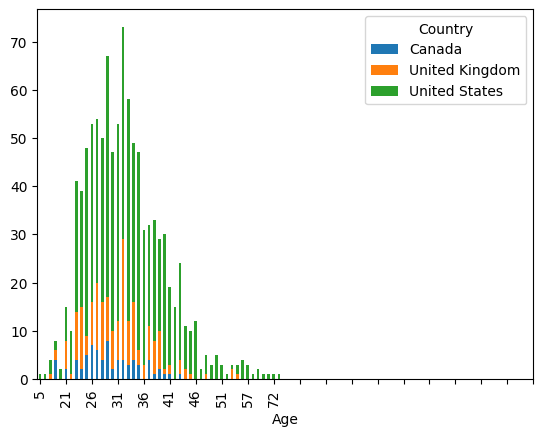

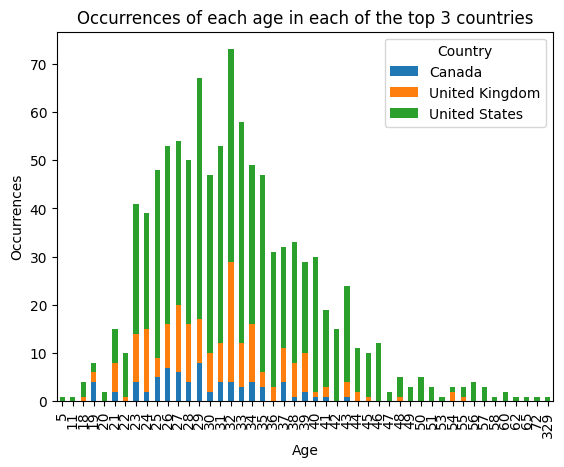

In [ ]:
# create a stacked bar plot for the occurrences of each age in each country
ax = filtered_grouped.pivot(index='Age', columns='Country', values='counts').plot(kind='bar', stacked=True)

# set the x-axis tick marks to show every 5 years
ax.set_xticks(np.arange(0, len(filtered_grouped['Age']), 5))

# create a stacked bar plot for the occurrences of each age in each country
filtered_grouped.pivot(index='Age', columns='Country', values='counts').plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Occurrences')
plt.title('Occurrences of each age in each of the top 3 countries')
plt.show()


**Explanation:** From the EDA, I can filter out the top 3 countries that have the most occurrences of age through two graphs. Through the coloured legend, it seems the most occurrences of mental health is in the United States (with the United Kingdom being second and Canada being third) so I will focus my attention on that.

### States with most common Occurrences of Mental Health Issues

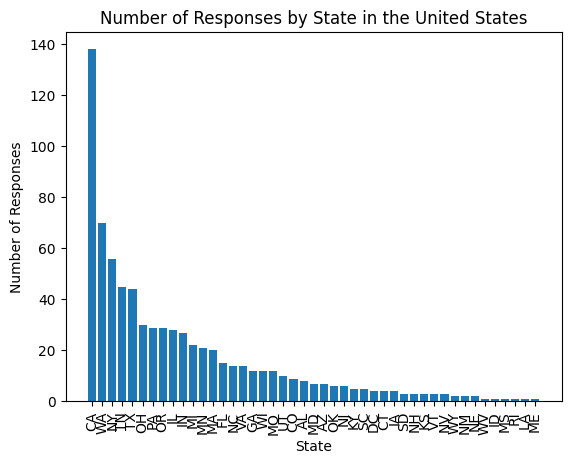

In [ ]:
# Creating a bar plot
plt.bar(state_counts.index, state_counts.values)
plt.title('Number of Responses by State in the United States')
plt.xlabel('State')
plt.ylabel('Number of Responses')

plt.xticks(rotation=90)
plt.show()

**Explanation:** From the graph above, it seems that the state of California in the United States has the most common occurrences of mental health issues.

### Most common Mental Health Issues by Age Range

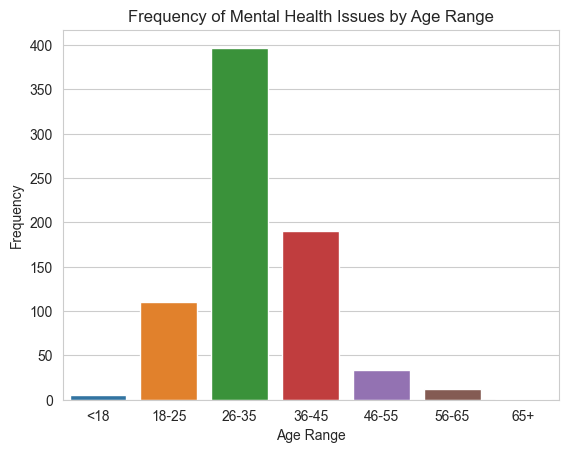

In [ ]:
sns.barplot(data=age_counts, x='Age Range', y='Frequency')
plt.title('Frequency of Mental Health Issues by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()


**Explanation:** Assume that this plot above is for the United States. It seems that adults ages 26 - 35 have the most common health issues in the United States.

## Pipelining

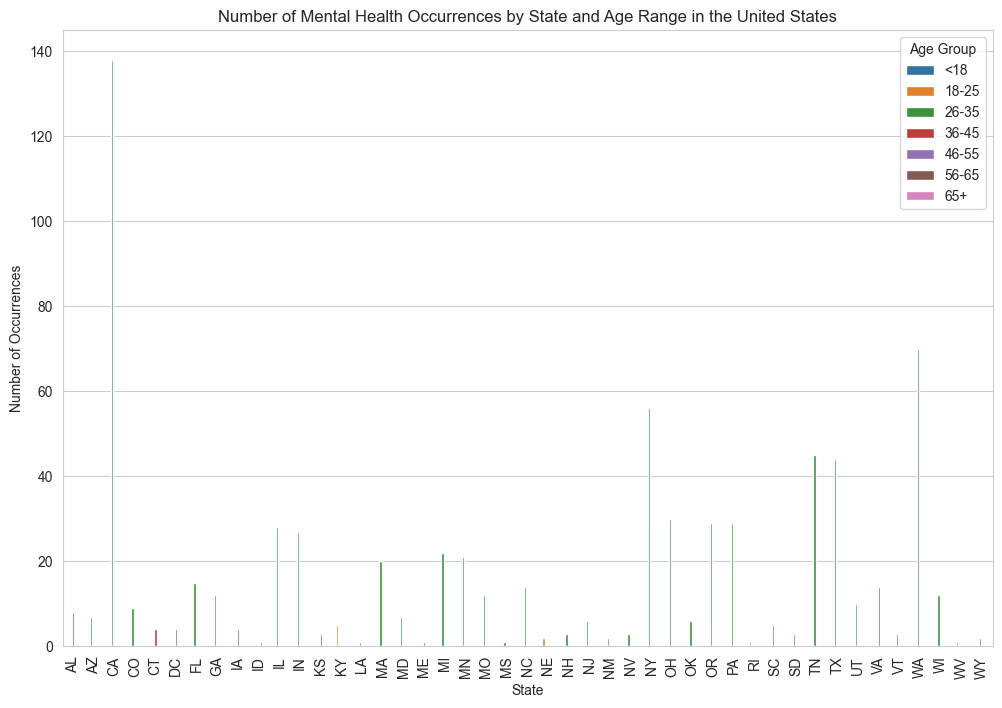

In [ ]:
# Count the number of responses for each state and age group
state_age_counts = us_df.groupby(['state', 'Age Group']).size().reset_index(name='counts')

# Find the most common age group and number of occurrences for each state
max_age_per_state = state_age_counts.groupby('state')['counts'].idxmax()
max_age_counts = state_age_counts.loc[max_age_per_state]

# Find the most common number of occurrences for each state
state_counts = us_df['state'].value_counts().reset_index(name='total_counts')

# Merge the two dataframes
merged_df = pd.merge(max_age_counts, state_counts, left_on='state', right_on='index', how='outer')
merged_df = merged_df.drop(columns=['index'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='total_counts', data=merged_df, hue='Age Group')
plt.title('Number of Mental Health Occurrences by State and Age Range in the United States')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()


**Explanation:** I am combining all three visualizations from above into one graph. This way it will hopefully answer the question through a more *neat* way of data analysis.

## Method Chaining

### Testing Various Method Chains

In [ ]:
# Dropping Extreme and Negative Ages
pivot_table = (pd.pivot_table(filtered_grouped, values='counts', index=['Country'], columns=['Age'], aggfunc='sum', fill_value=0)
               .loc[~pivot_table.index.astype(str).str.startswith('-')]
               .drop([-1726, -29, -1,329], axis=1)
               .assign(Total=lambda df: df.sum(axis=1))
               .sort_values(by='Total', ascending=False)
               .drop(columns=['Total']))

# Combine the method chains to get the top 5 states with the most health issues in the United States
state_counts = (df[df['Country'] == 'United States']
                ['state'].value_counts()
                .sort_values(ascending=False)
                .head(5))



Age,5,11,18,19,20,21,22,23,24,25,...,53,54,55,56,57,58,60,62,65,72
Country,,,,,,,,,,,,,,,,,,,,,
United States,1,1,3,2,2,7,9,27,24,39,...,1,1,2,4,3,1,2,1,1,1
United Kingdom,0,0,1,2,0,6,1,10,13,4,...,0,2,1,0,0,0,0,0,0,0
Canada,0,0,0,4,0,2,0,4,2,5,...,0,0,0,0,0,0,0,0,0,0
Germany,0,0,0,0,0,1,0,2,2,4,...,0,0,0,0,0,0,0,0,0,0
Ireland,0,0,0,0,0,0,0,2,3,2,...,0,0,0,0,0,0,0,0,0,0
Netherlands,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,1,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
France,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
India,0,0,0,0,1,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0


### Putting them into a Function

In [ ]:
def load_and_isolate_US(url_or_path_to_csv_file):
    # Method Chain 1 (Load data and deal with missing data)
    df = (
          pd.read_csv(url_or_path_to_csv_file)
      )

    # Method Chain 2 (Filter out non-US data)
    filtered_df = (
          df[df['Country'] == 'United States']
          .reset_index(drop=True)
      )

    # Method Chain 3 (Group the data by Country and Age, and count the occurrences)
    grouped = (
          filtered_df.groupby(['Country', 'Age'])
          .size()
          .reset_index(name='counts')
      )
    
    # Method Chain 4 (Remove Negative & Extreme Ages)
    pivot = (pd.pivot_table(grouped, values='counts', index=['Country'], columns=['Age'], aggfunc='sum', fill_value=0)
             .drop([-29, -1,329], axis=1)
             
      )

    return pivot


**Note:** This can be found in the project_functions1.py module under `analysis/code/project_functions1.py`